# We do this as column are not normally distributed so need to ahe normal distbuted data so that have model friendly data models such linear and logsitic depend on nature of the data so its importnat to ahve transformation whereas some model doesnt care about the distribution of the model such as Decision tree.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats  #to plot the QQplot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer #a PDF data is converted into Normal distribution 
from sklearn.compose import ColumnTransformer

In [3]:
df= pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
X= df.iloc[:,1:3]
y= df.iloc[:,0]

In [16]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state= 42)

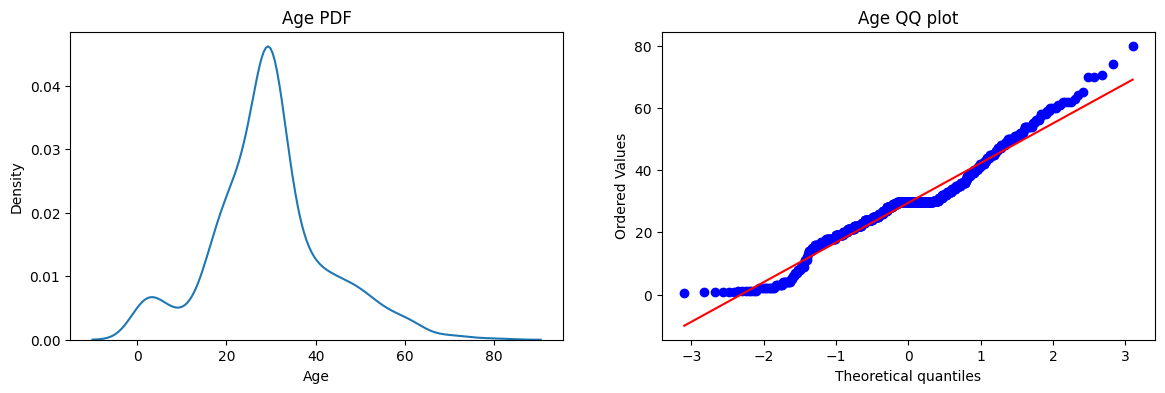

In [17]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.kdeplot(data=X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm', plot=plt)
plt.title('Age QQ plot')

plt.show()

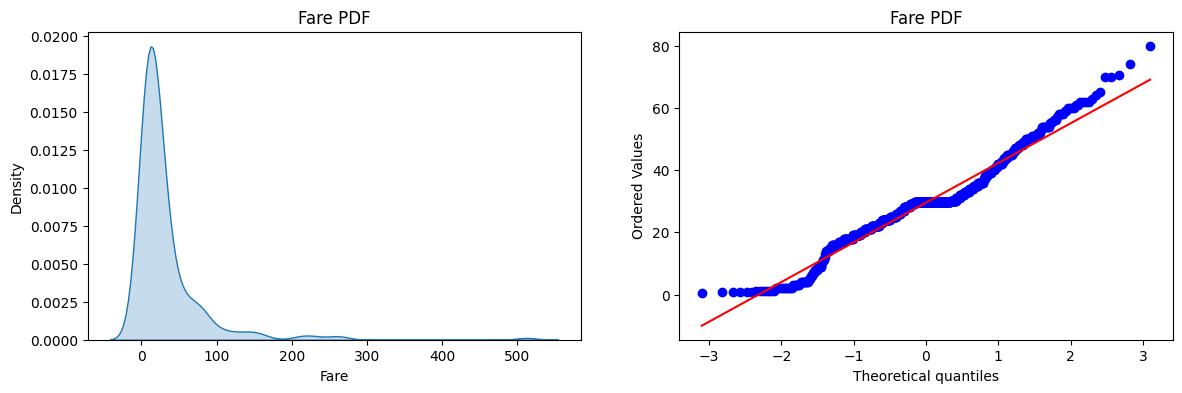

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Fare'], fill= True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist= 'norm', plot=plt)
plt.title('Fare PDF')

plt.show()    # As data is right squed need to apply log transform

In [20]:
clf1= LogisticRegression()
clf2= DecisionTreeClassifier()

In [24]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1= clf1.predict(X_test)
y_pred2= clf2.predict(X_test)

print('Accuracy LR', accuracy_score(y_test,y_pred1)*100,'%')
print('Accuracy DT', accuracy_score(y_test,y_pred2)*100,'%')

Accuracy LR 64.80446927374301 %
Accuracy DT 67.0391061452514 %


# Applying Functional Transformation

In [26]:
trf= FunctionTransformer(func =np.log1p) #np.log used when simply apply log but if have 0 it will be issue wheras np.log1p add 1 to the data so dont ahve 0 anytime 

In [27]:
X_train_trns= trf.fit_transform(X_train)
X_test_trns= trf.fit_transform(X_test)

In [29]:
clf3= LogisticRegression()
clf4= DecisionTreeClassifier()

clf3.fit(X_train_trns,y_train)
clf4.fit(X_train_trns,y_train)

y_pred1= clf3.predict(X_test_trns)
y_pred2= clf4.predict(X_test_trns)

print('Accuracy LR', accuracy_score(y_test,y_pred1)*100,'%')
print('Accuracy DT', accuracy_score(y_test,y_pred2)*100,'%')

Accuracy LR 68.15642458100558 %
Accuracy DT 67.59776536312849 %


In [37]:
X_transformed= trf.fit_transform(X)

clf5= LogisticRegression()
clf6= DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf5,X_transformed,y,scoring='accuracy',cv= 10))*100,'%')
print('DR', np.mean(cross_val_score(clf6,X_transformed,y,scoring='accuracy',cv= 10))*100,'%')

LR 67.80274656679151 %
DR 65.5505617977528 %


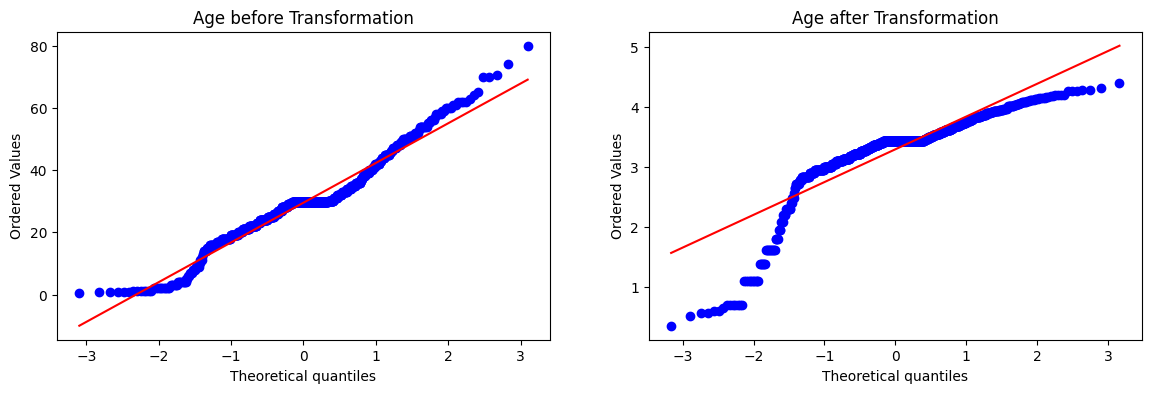

In [42]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist= 'norm', plot= plt)
plt.title('Age before Transformation')

plt.subplot(122)
stats.probplot(X_transformed['Age'], dist= 'norm', plot= plt)
plt.title('Age after Transformation')
plt.show()

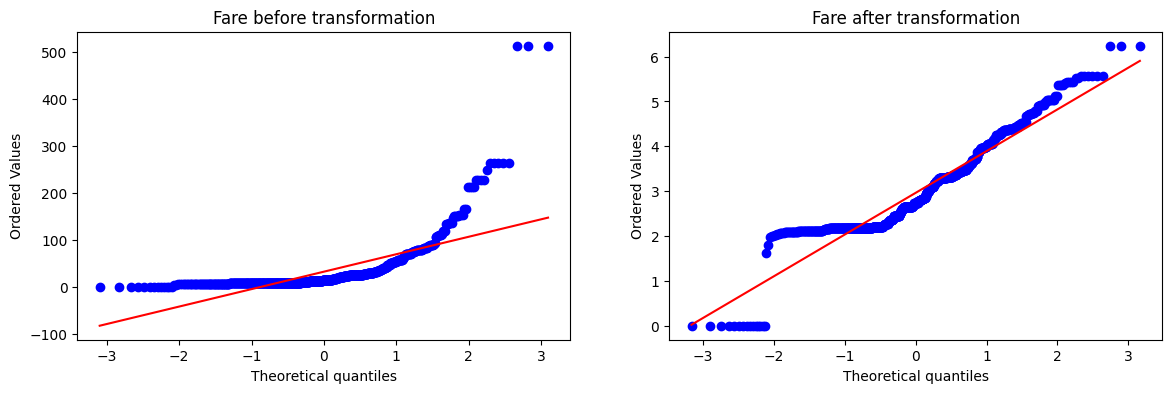

In [44]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist= 'norm', plot= plt)
plt.title('Fare before transformation')

plt.subplot(122)
stats.probplot(X_transformed['Fare'], dist= 'norm', plot= plt)
plt.title('Fare after transformation')

plt.show()

In [47]:
trf2= ColumnTransformer([
    ('log', FunctionTransformer(np.log1p),['Fare'])
],remainder= 'passthrough')

X_train_transformed= trf2.fit_transform(X_train)
X_test_transformed= trf2.fit_transform(X_test)

In [49]:
clf5= LogisticRegression()
clf6= DecisionTreeClassifier()

clf5.fit(X_train_transformed,y_train)
clf6.fit(X_train_transformed,y_train)

y_pred3= clf5.predict(X_test_transformed)
y_pred4= clf6.predict(X_test_transformed)

print('Accuracy LR', accuracy_score(y_test,y_pred3)*100,'%')
print('Accuracy DT', accuracy_score(y_test,y_pred4)*100,'%')

Accuracy LR 67.0391061452514 %
Accuracy DT 67.0391061452514 %


In [52]:
print('LR',np.mean(cross_val_score(clf5,X_transformed,y,scoring='accuracy',cv= 10))*100,'%')
print('DT',np.mean(cross_val_score(clf6,X_transformed,y,scoring='accuracy',cv= 10))*100, '%')

LR 67.80274656679151 %
DT 66.2234706616729 %
